# ARIMA Model

### Add project path to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from script.ARIMA_modelling import Modelling
arima=Modelling()

### Load Data

In [3]:
import pandas as pd
brentoil_price=pd.read_csv("data/brent_oil_price_data.csv")
brentoil_price.set_index("Date",inplace=True)

## Check Stationarity

Test Statistics: -1.993856011392466
p-Value: 0.2892735048934034
Lag used: 29
Number of observation: 29
Critical Values': {'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}
Conclusion: Non-Stationary


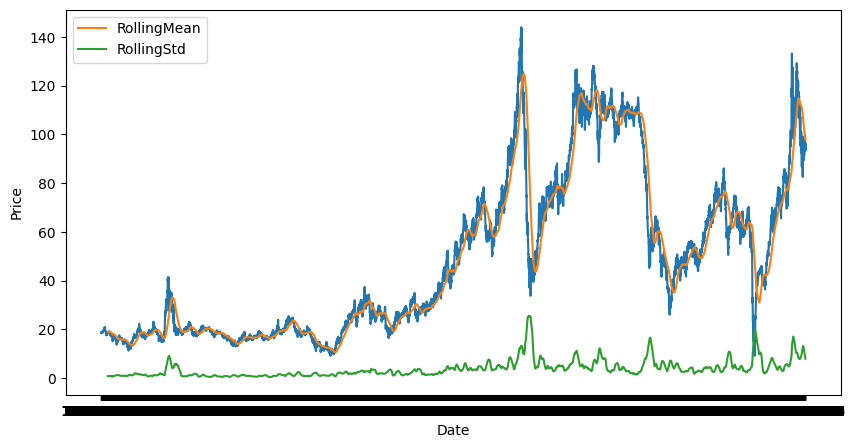

In [4]:
arima.check_stationarity(brentoil_price,'Price')

### Transform to Stationary 
There are different methods to make the data stationary
* **Difference**
* **Logarithm**
* **Square Root**
* **Combination**

### Logarithmic Transformation

In [5]:
import numpy as np
brentoil_price['logPrice']=np.log(brentoil_price['Price'])

Test Statistics: -1.8088944145306611
p-Value: 0.376054890510537
Lag used: 29
Number of observation: 29
Critical Values': {'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}
Conclusion: Non-Stationary


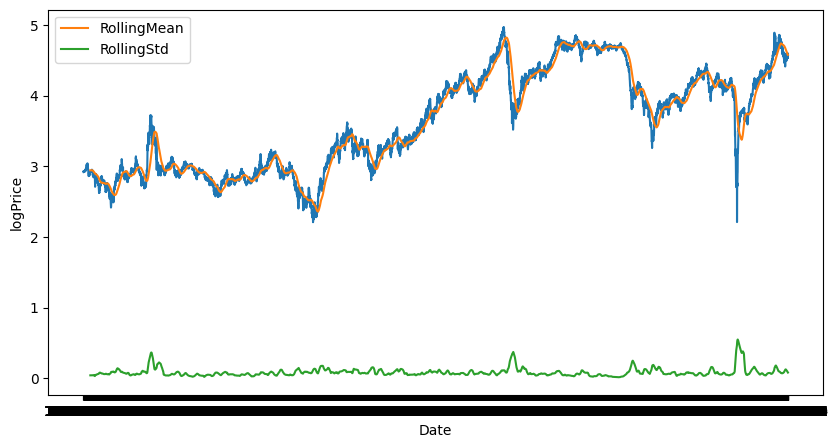

In [6]:
arima.check_stationarity(brentoil_price,'logPrice')

### First Difference

In [7]:
brentoil_price['diff']=brentoil_price['Price'].diff()

Test Statistics: -15.448616672762904
p-Value: 2.8033477182159807e-28
Lag used: 28
Number of observation: 28
Critical Values': {'1%': -3.4310855435237153, '5%': -2.86186506202756, '10%': -2.5669430255106724}
Conclusion: Stationary


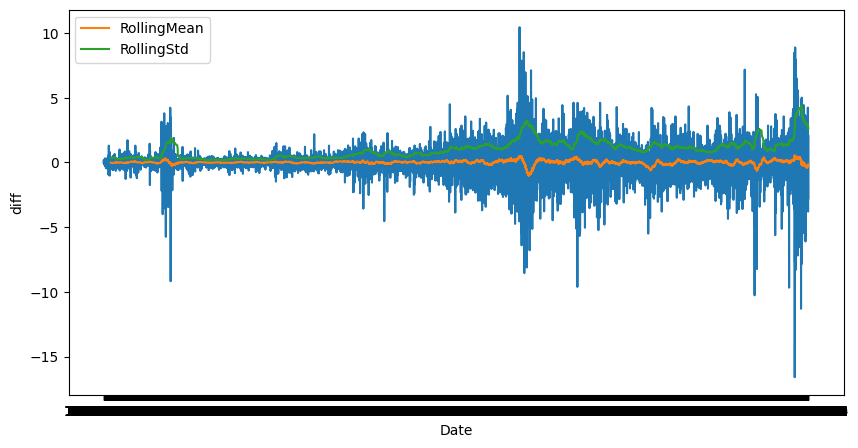

In [8]:
arima.check_stationarity(brentoil_price.dropna(),'diff')

### Combination of Square root and Logarithm

In [9]:
brentoil_price['sqrtlogPrice']=np.sqrt(brentoil_price['logPrice'])

Test Statistics: -1.8425852487241057
p-Value: 0.35953350309431686
Lag used: 29
Number of observation: 29
Critical Values': {'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}
Conclusion: Non-Stationary


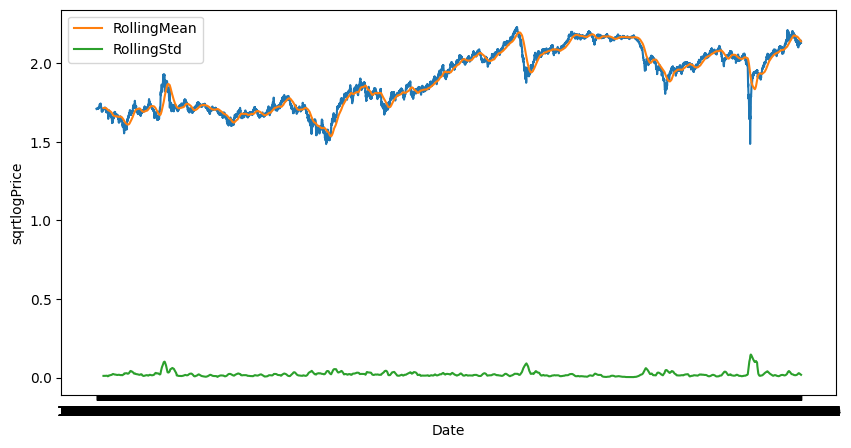

In [10]:
arima.check_stationarity(brentoil_price,'sqrtlogPrice')

### Combination of Differnce, Square root and Logarithm 

In [11]:
brentoil_price['difflogsqrtPrice']=brentoil_price['sqrtlogPrice'].diff()

Test Statistics: -16.473147421521972
p-Value: 2.2732101351738417e-29
Lag used: 28
Number of observation: 28
Critical Values': {'1%': -3.4310855435237153, '5%': -2.86186506202756, '10%': -2.5669430255106724}
Conclusion: Stationary


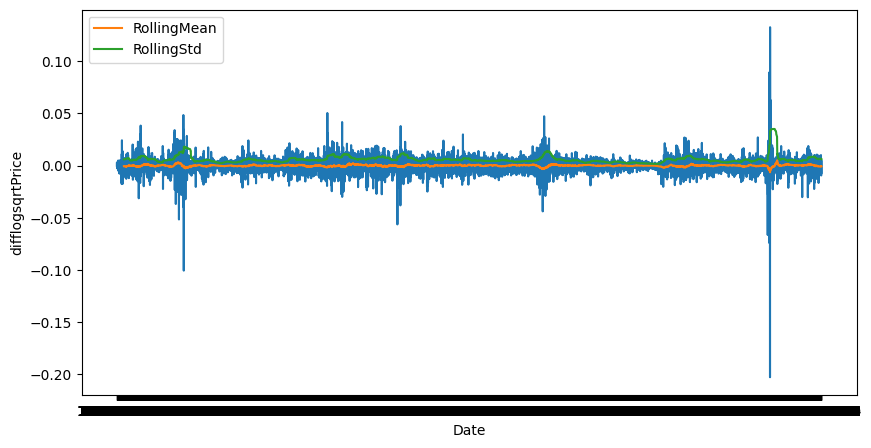

In [12]:
arima.check_stationarity(brentoil_price.dropna(),'difflogsqrtPrice')

### Finfding p,d,q values

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

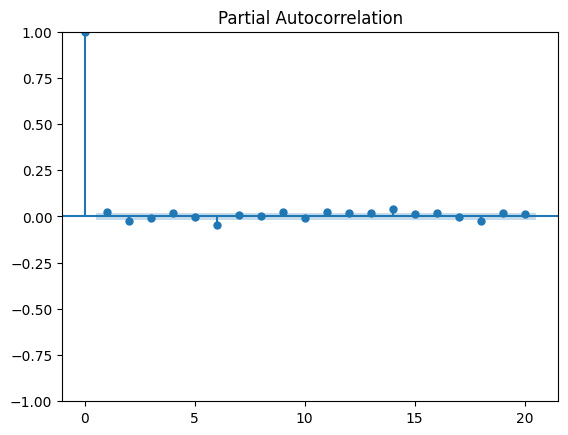

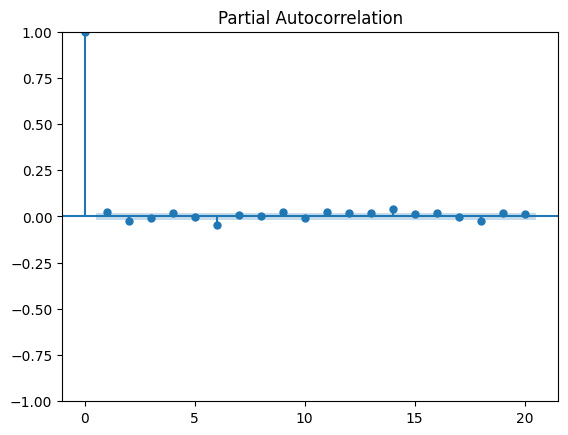

In [14]:
plot_pacf(brentoil_price['diff'].dropna(),lags=20)

### Interpretation
In the given PACF plot, we observe:

**Significant Lag**: There's a significant spike at lag 1. This suggests that the current value of the time series is directly influenced by its immediate past value.

**No Significant Lags Beyond 1**: The subsequent lags have negligible or no significant correlation with the current value.

**Determining the Order of the AR Term (p)**
Based on the PACF plot, we can infer that the appropriate value for **p in an ARIMA model is 1**. This indicates that an AR(1) model might be suitable for capturing the autoregressive component of the time series.

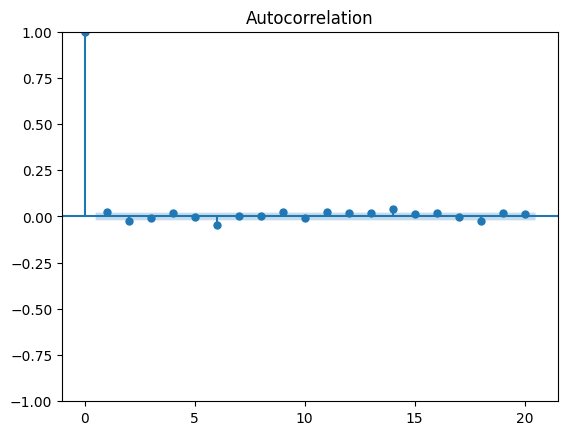

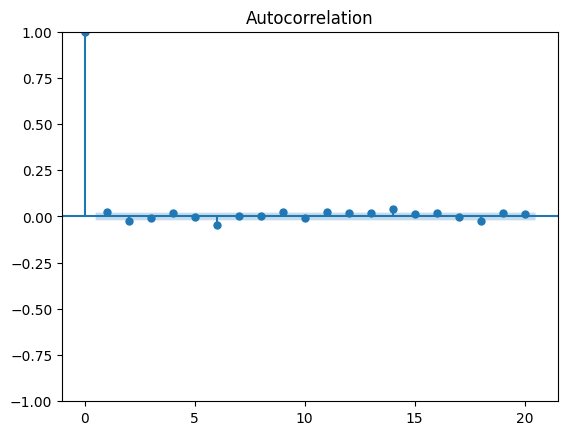

In [15]:
plot_acf(brentoil_price['diff'].dropna(),lags=20)

### Interpreting the Plot

In the given ACF plot, we observe:

**Significant Lag**: There's a significant spike at lag 1. This suggests that the current value of the time series is directly influenced by its immediate past value.

**No Significant Lags Beyond 1**: The subsequent lags have negligible or no significant correlation with the current value.

**Determining the Order of the MA Term (q)
**
Based on the ACF plot, we can infer that the appropriate value for **q in an ARIMA model is 1**. This indicates that an MA(1) model might be suitable for capturing the moving average component of the time series.

### Train-test split

In [17]:
train_df,test_df=arima.trai_test_split(brentoil_price)

## Train ARIMA model

In [20]:
y_true,y_pred,actual_vs_prediction=arima.train_arima_model(train_df,test_df)

g:\Programming\10_Academy\Week_10\Brent_Oil_Price_Changepont_Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
g:\Programming\10_Academy\Week_10\Brent_Oil_Price_Changepont_Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
g:\Programming\10_Academy\Week_10\Brent_Oil_Price_Changepont_Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
g:\Programming\10_Academy\Week_10\Brent_Oil_Price_Changepont_Analysis\.venv\Lib\site-pac

## Evaluation

In [26]:
arima.evaluate_arima_model(y_true,y_pred)

Mean Absolute Error (MAE): 52.09192940609662
Mean Squared Error (MSE): 3394.385227475103
Root Mean Squared Error (RMSE): 58.26135277759265
R Square Score (r2_score): -3.9681495071386017
Mean Absolute Percentage Error (MAPE): 98.01071091161106 %


## Plot Prediction Result

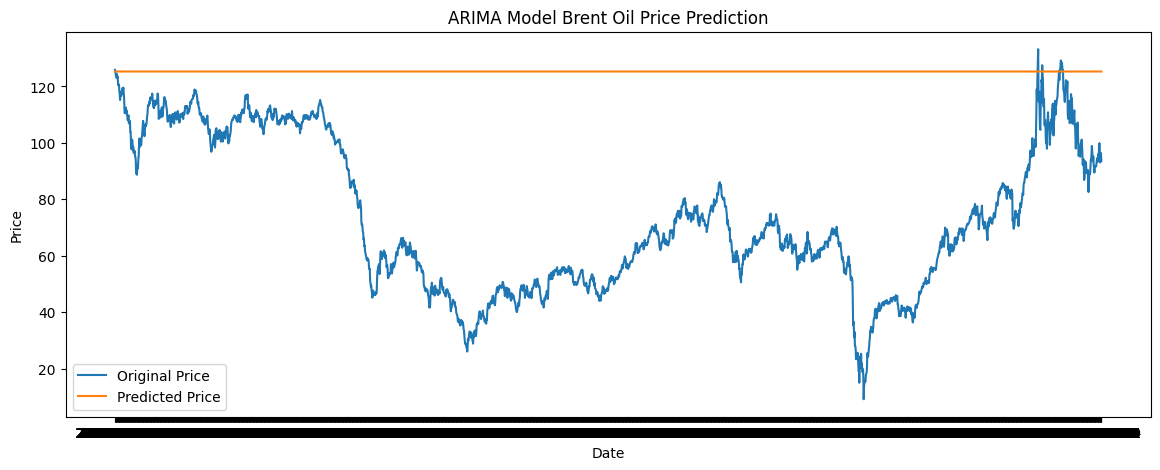

In [25]:
arima.plot_result(actual_vs_prediction)